In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helpers import *
from RandomForest import *

from time import time

Loading data...
Removing rows with less than 1000 counts...
Convert counts to frequencies...
Data loaded!
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=20, accuracy=0.955, eukaryote_accuracy=0.940, procaryote_accuracy=0.967, total=   6.7s
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  max_depth=5, n_estimators=20, accuracy=0.954, eukaryote_accuracy=0.945, procaryote_accuracy=0.961, total=   6.5s
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.3s remaining:    0.0s


[CV]  max_depth=5, n_estimators=20, accuracy=0.957, eukaryote_accuracy=0.950, procaryote_accuracy=0.962, total=   6.5s
[CV] max_depth=5, n_estimators=20 ....................................
[CV]  max_depth=5, n_estimators=20, accuracy=0.951, eukaryote_accuracy=0.931, procaryote_accuracy=0.968, total=   6.5s
[CV] max_depth=5, n_estimators=20 ....................................
[CV]  max_depth=5, n_estimators=20, accuracy=0.949, eukaryote_accuracy=0.935, procaryote_accuracy=0.961, total=   7.3s
[CV] max_depth=5, n_estimators=80 ....................................
[CV]  max_depth=5, n_estimators=80, accuracy=0.962, eukaryote_accuracy=0.951, procaryote_accuracy=0.971, total=  26.1s
[CV] max_depth=5, n_estimators=80 ....................................
[CV]  max_depth=5, n_estimators=80, accuracy=0.964, eukaryote_accuracy=0.954, procaryote_accuracy=0.973, total=  24.9s
[CV] max_depth=5, n_estimators=80 ....................................
[CV]  max_depth=5, n_estimators=80, accuracy=0.962

[CV]  max_depth=10, n_estimators=200, accuracy=0.978, eukaryote_accuracy=0.971, procaryote_accuracy=0.984, total= 1.9min
[CV] max_depth=10, n_estimators=200 ..................................
[CV]  max_depth=10, n_estimators=200, accuracy=0.981, eukaryote_accuracy=0.973, procaryote_accuracy=0.988, total= 1.9min
[CV] max_depth=10, n_estimators=200 ..................................
[CV]  max_depth=10, n_estimators=200, accuracy=0.982, eukaryote_accuracy=0.979, procaryote_accuracy=0.985, total= 1.9min
[CV] max_depth=10, n_estimators=200 ..................................
[CV]  max_depth=10, n_estimators=200, accuracy=0.979, eukaryote_accuracy=0.967, procaryote_accuracy=0.989, total= 1.9min
[CV] max_depth=10, n_estimators=200 ..................................
[CV]  max_depth=10, n_estimators=200, accuracy=0.980, eukaryote_accuracy=0.969, procaryote_accuracy=0.989, total= 1.9min
[CV] max_depth=15, n_estimators=20 ...................................
[CV]  max_depth=15, n_estimators=20, acc

[CV]  max_depth=20, n_estimators=100, accuracy=0.982, eukaryote_accuracy=0.973, procaryote_accuracy=0.989, total= 1.3min
[CV] max_depth=20, n_estimators=100 ..................................
[CV]  max_depth=20, n_estimators=100, accuracy=0.984, eukaryote_accuracy=0.980, procaryote_accuracy=0.987, total= 1.3min
[CV] max_depth=20, n_estimators=150 ..................................
[CV]  max_depth=20, n_estimators=150, accuracy=0.983, eukaryote_accuracy=0.980, procaryote_accuracy=0.985, total= 2.0min
[CV] max_depth=20, n_estimators=150 ..................................
[CV]  max_depth=20, n_estimators=150, accuracy=0.982, eukaryote_accuracy=0.978, procaryote_accuracy=0.986, total= 2.0min
[CV] max_depth=20, n_estimators=150 ..................................
[CV]  max_depth=20, n_estimators=150, accuracy=0.986, eukaryote_accuracy=0.986, procaryote_accuracy=0.986, total= 2.0min
[CV] max_depth=20, n_estimators=150 ..................................
[CV]  max_depth=20, n_estimators=150, ac

[CV]  max_depth=50, n_estimators=80, accuracy=0.982, eukaryote_accuracy=0.977, procaryote_accuracy=0.987, total= 1.2min
[CV] max_depth=50, n_estimators=80 ...................................
[CV]  max_depth=50, n_estimators=80, accuracy=0.985, eukaryote_accuracy=0.986, procaryote_accuracy=0.985, total= 1.1min
[CV] max_depth=50, n_estimators=80 ...................................
[CV]  max_depth=50, n_estimators=80, accuracy=0.981, eukaryote_accuracy=0.969, procaryote_accuracy=0.990, total= 1.1min
[CV] max_depth=50, n_estimators=80 ...................................
[CV]  max_depth=50, n_estimators=80, accuracy=0.983, eukaryote_accuracy=0.977, procaryote_accuracy=0.987, total= 1.2min
[CV] max_depth=50, n_estimators=100 ..................................
[CV]  max_depth=50, n_estimators=100, accuracy=0.983, eukaryote_accuracy=0.978, procaryote_accuracy=0.987, total= 1.4min
[CV] max_depth=50, n_estimators=100 ..................................
[CV]  max_depth=50, n_estimators=100, accura

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 188.6min finished


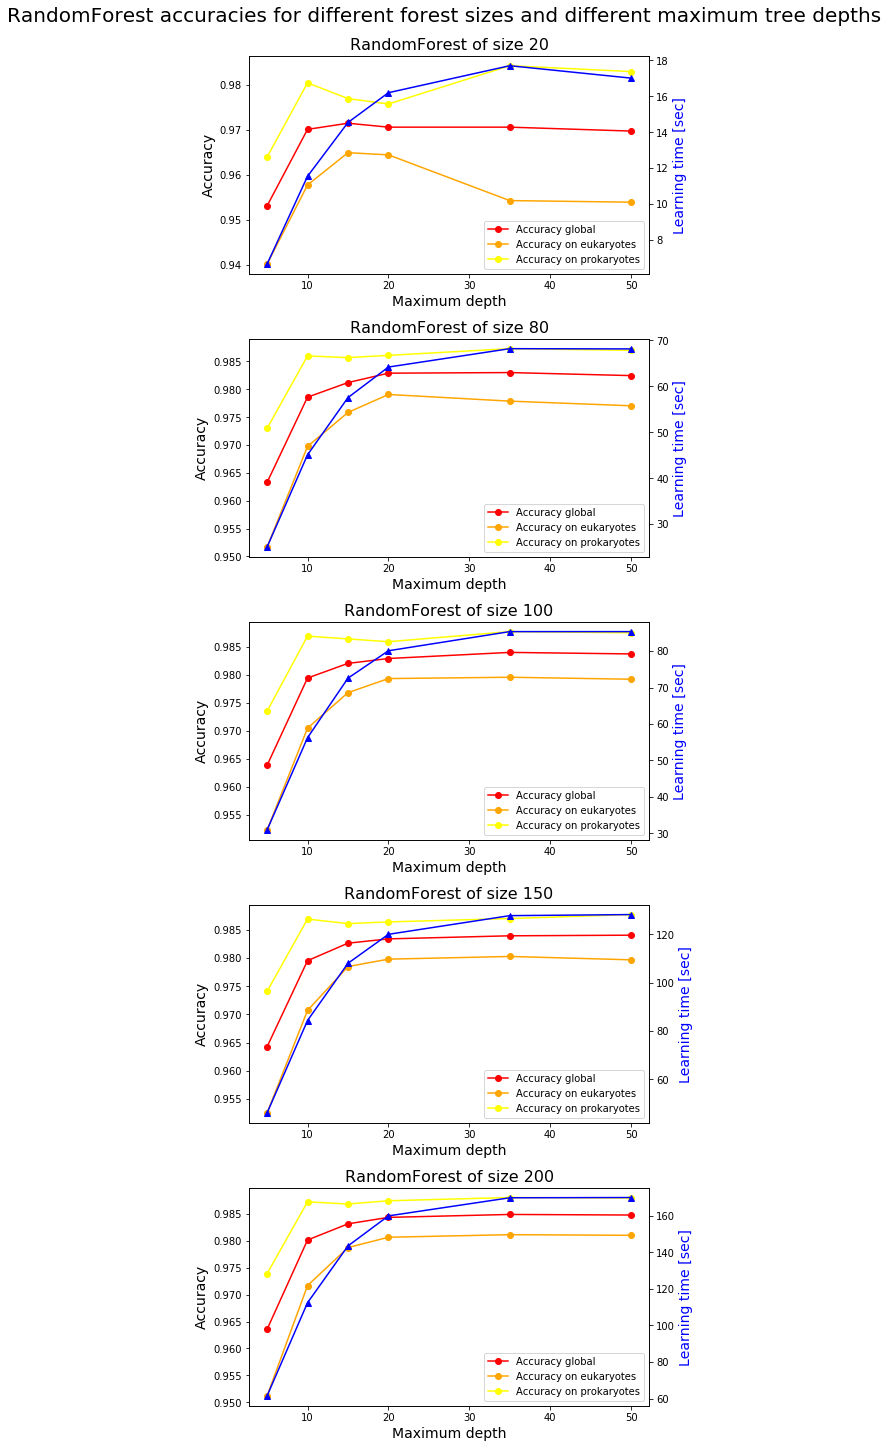

11551.05209493637


In [2]:
# global param
seed = 42
n_jobs= None
y, X, ids = load_csv_data("Counts_n10000_k5_s5000.csv")

t1 = time()
df = grid_search_RF(X, y, seed, n_jobs, cv=5, verbose=3)
t2 = time()
print(t2-t1)

First observation is that the estimator has quite bad results for a forest size 20, while for sizes of 100 and 200, the accuracies are very satisfying : arround 98%.

Notice also that for sizes 100 and 200, we basically get the same accuracy results/curves. A noticable difference is that the bigger forest takes way more time to learn than the smaller one, while giving approximately the same accuracies. It seems reasonable to choose a size of `n = 100` in this case.

Finally, the accuracy stays approximately constant for a maximum depth bigger than 20. As the learning time increases with the maximum depth, the best choice of the depth is `d=20`.

In [3]:
# manually choose the best tradeoff
n = 100
d = 20
df.loc[df['n_estimators'] == n][df['max_depth'] == d]

/Users/anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,n_estimators,max_depth,accuracy,procaryote accuracy,eukaryote accuracy,learning time
17,100,20,0.982894,0.985891,0.979311,80.085667


Remains to do :
- [ ] n_estimators and max_depths to ints (i.e. handle the None case) 